In [ ]:
#Bismillahirrahmanirrahim
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the data
ens_learn = pd.read_excel('/content/drive/MyDrive/dataa/Data hasil.xlsx')
ens_learn_copy = ens_learn
# Checking first 10 rows of data
ens_learn.head(10)

,URL User,URL Gambar,User,Tag,Tanggal,Hastag,Isi,Retweet,Like,Aplikasi,Label,Keterangan
0,https://x.com/tanyakanrl,https://pbs.twimg.com/profile_images/140623608...,Tanyarl,@tanyakanrl,Feb 17,kendaraan listrik,"tugas bikin ekosistem, maket rumah, makalah, s...",3.2K,44K,X,4,Sangat negatif
1,https://x.com/jokowi,https://pbs.twimg.com/profile_images/164676912...,Joko Widodo,@jokowi,Jul 7,kendaraan listrik,Dimulai dengan hadir pada Upacara peringatan H...,76,573,X,2,Netral
2,https://x.com/PartaiSocmed,https://pbs.twimg.com/profile_images/177910066...,#99,@PartaiSocmed,"Sep 19, 2022",kendaraan listrik,Dulu perusahaan kereta cepat China rugi gila2a...,1.5K,3.4K,X,1,Positif
3,https://x.com/PngAdilnR4kyt,https://pbs.twimg.com/profile_images/163178332...,Pengadilan Rakyat,@PngAdilnR4kyt,Jul 2,kendaraan listrik,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,361,525,X,4,Sangat negatif
4,https://x.com/antaranews,https://pbs.twimg.com/profile_images/119334534...,antaranews.com,@antaranews,"Nov 17, 2021",kendaraan listrik,Menko Marves sampaikan pengembangankendaraanli...,1,2,X,1,Positif
5,https://x.com/detikcom,https://pbs.twimg.com/profile_images/177759192...,detikcom,@detikcom,"Nov 15, 2021",kendaraan listrik,Beragam kendaraan listrik dipamerkan di Gaikin...,2,11,X,1,Positif
6,https://x.com/KompasTV,https://pbs.twimg.com/profile_images/143083004...,KOMPAS TV,@KompasTV,"Oct 25, 2021",kendaraan listrik,Luhut: MobilListrikHyundai Genesis G80 JadiKen...,7,NaN,X,0,Sangat Positif
7,https://x.com/CNNIndonesia,https://pbs.twimg.com/profile_images/669793728...,CNN Indonesia,@CNNIndonesia,"Nov 12, 2021",kendaraan listrik,FOTO: DeretanKendaraanListrikdi GIIAS 2021,NaN,NaN,X,1,Positif
8,https://x.com/PLNBabel,https://pbs.twimg.com/profile_images/128286024...,Info Listrik Babel,@PLNBabel,"Nov 15, 2021",kendaraan listrik,"Electrizen, PLN terus mendorong akselerasi ken...",2,NaN,X,1,Positif
9,https://x.com/liputan6dotcom,https://pbs.twimg.com/profile_images/170623680...,LIPUTAN6,@liputan6dotcom,"Nov 15, 2021",kendaraan listrik,PLN Gunakan 264 MotorListrikuntukKendaraanOper...,NaN,NaN,X,0,Sangat Positif


# **Data Preprocessing**

In [ ]:
# Ganti 'data' dengan 'ens_learn' di fungsi drop
ens_learn.drop(['URL User', 'URL Gambar', 'User', 'Tag', 'Tanggal', 'Hastag', 'Retweet', 'Like', 'Aplikasi'], axis=1, inplace=True, errors='ignore')
ens_learn

,Isi,Label,Keterangan
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif
...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif


**Cleaning (Case folding)**



In [ ]:
# case folding

def clean_text(text):
  # Check if text is a string before applying re.sub
  if isinstance(text, str):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
  else:
    # Handle non-string values (e.g., NaN) by returning an empty string
    return ''

ens_learn['cleaned_text'] = ens_learn['Isi'].apply(lambda x: clean_text(x))
ens_learn.head()

,Isi,Label,Keterangan,cleaned_text
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...


**Filtering (Stopwords Removal)**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

all_stopwords = stopwords.words('indonesian')
all_stopwords.remove('tidak')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing the URl

def rem_url(cleaned_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',cleaned_text)

# Removing the stepwords 'indonesian'

def rem_stopwords(cleaned_text):
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in (stopwords.words('indonesian'))])
    return cleaned_text

# Removing the html

def rem_html(cleaned_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',cleaned_text)

def remove_at_mentions(cleaned_text):
    return re.sub(r'@\w+', '', cleaned_text)


# Removing emojis by codes

def rem_emoji(cleaned_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', cleaned_text)

# Fixing the cleaned_text

def fixing(cleaned_text):
    cleaned_text = re.sub(r"jembut", " buruk", cleaned_text)
    return cleaned_text

# Seperate alphabets

def sep_alphabets(cleaned_text):
    words = cleaned_text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def review_to_words(review):
    letters_only = re.sub("[^a-zA-Z]", " ",review)
    words = letters_only.lower().split()
    stops = set(stopwords.words("indonesian"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

ens_learn['filtered_text'] = ens_learn['cleaned_text']

ens_learn['filtered_text'] = ens_learn['filtered_text'].astype(str).apply(remove_at_mentions)
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_url(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_stopwords(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_html(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : rem_emoji(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : sep_alphabets(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].apply(lambda x : review_to_words(x))
ens_learn['filtered_text'] = ens_learn['filtered_text'].astype(str).replace("jembut", "buruk", regex=True)


# result

ens_learn['filtered_text']

,filtered_text
0,tugas bikin ekosistem maket rumah makalah scra...
1,hadir upacara peringatan bhayangkara meresmika...
2,perusahaan kereta cepat china rugi gila an ind...
3,investor kabur raksasa produsen baterai evkend...
4,menko marves pengembangankendaraanlistrikpenti...
...,...
5167,chargeran kyak gtu cm sekian luasnya indonesia...
5168,gak tau bu kos karna otw beli mobilnya
5169,kalo bnyakan mobil listrik yg charger antri dr...
5170,mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
filtered_text = stopwords.words('indonesian')
ens_learn['filtered_text'] = ens_learn['filtered_text']
ens_learn.head()

,Isi,Label,Keterangan,cleaned_text,filtered_text
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...


**Tokenizing**

In [ ]:
# tokenizing

def tokenize_text(text):
  tokenized_text = text.split()
  return tokenized_text
ens_learn['tokens'] = ens_learn['filtered_text'].apply(lambda x: tokenize_text(x))
ens_learn.head()

,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"[tugas, bikin, ekosistem, maket, rumah, makala..."
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"[hadir, upacara, peringatan, bhayangkara, mere..."
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"[perusahaan, kereta, cepat, china, rugi, gila,..."
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"[investor, kabur, raksasa, produsen, baterai, ..."
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"[menko, marves, pengembangankendaraanlistrikpe..."


**Stemmed**

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer Bahasa Indonesia
stemmer = StemmerFactory().create_stemmer()

# Fungsi Lemmatisasi (Stemming) untuk Bahasa Indonesia
def stem_text(token_list):
    return " ".join([stemmer.stem(token) for token in token_list])

# Menerapkan Stemming pada DataFrame
ens_learn['stemmed_review'] = ens_learn['tokens'].apply(lambda x: stem_text(x))
ens_learn.head()

,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"[tugas, bikin, ekosistem, maket, rumah, makala...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"[hadir, upacara, peringatan, bhayangkara, mere...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"[perusahaan, kereta, cepat, china, rugi, gila,...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"[investor, kabur, raksasa, produsen, baterai, ...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"[menko, marves, pengembangankendaraanlistrikpe...",menko marves pengembangankendaraanlistrikpenti...


In [ ]:
from IPython.display import display
display(ens_learn)

,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"[tugas, bikin, ekosistem, maket, rumah, makala...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"[hadir, upacara, peringatan, bhayangkara, mere...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"[perusahaan, kereta, cepat, china, rugi, gila,...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"[investor, kabur, raksasa, produsen, baterai, ...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"[menko, marves, pengembangankendaraanlistrikpe...",menko marves pengembangankendaraanlistrikpenti...
...,...,...,...,...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif,chargeran kyak gtu cm diantara sekian luasny...,chargeran kyak gtu cm sekian luasnya indonesia...,"[chargeran, kyak, gtu, cm, sekian, luasnya, in...",chargeran kyak gtu cm sekian luas indonesia kc...
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif,gak tau bu kos karna aku baru mau otw beli mob...,gak tau bu kos karna otw beli mobilnya,"[gak, tau, bu, kos, karna, otw, beli, mobilnya]",gak tau bu kos karna otw beli mobil
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif,kalo bnyakan mobil listrik yg mau charger bisa...,kalo bnyakan mobil listrik yg charger antri dr...,"[kalo, bnyakan, mobil, listrik, yg, charger, a...",kalo bnyakan mobil listrik yg charger antri dr...
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif,mobil listrik kek ny lebih ribet deh soal ny k...,mobil listrik kek ny ribet deh ny klo nge char...,"[mobil, listrik, kek, ny, ribet, deh, ny, klo,...",mobil listrik kek ny ribet deh ny klo nge char...


**Hasil Dataset Preprocessing**

In [ ]:
display(ens_learn[['Label', 'Keterangan', 'stemmed_review']])

,Label,Keterangan,stemmed_review
0,4,Sangat negatif,tugas bikin ekosistem maket rumah makalah scra...
1,2,Netral,hadir upacara ingat bhayangkara resmi ekosiste...
2,1,Positif,usaha kereta cepat china rugi gila an indonesi...
3,4,Sangat negatif,investor kabur raksasa produsen baterai evkend...
4,1,Positif,menko marves pengembangankendaraanlistrikpenti...
...,...,...,...
5167,0,Sangat Positif,chargeran kyak gtu cm sekian luas indonesia kc...
5168,3,Negatif,gak tau bu kos karna otw beli mobil
5169,4,Sangat negatif,kalo bnyakan mobil listrik yg charger antri dr...
5170,3,Negatif,mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
ens_learn.to_csv("preprocessingKendaraanListrik.csv", index = False) # Replace 'my_ens_learn' with 'ens_learn'

In [ ]:
# Baca file CSV menjadi DataFrame
ens_learn = pd.read_csv('preprocessingKendaraanListrik.csv')

# Hapus baris dengan nilai kosong
ens_learn_cleaned = ens_learn.dropna()

# Tampilkan DataFrame setelah penghapusan
print("\nDataFrame Setelah Penghapusan:")
display(ens_learn)

# Simpan DataFrame setelah penghapusan ke file CSV baru (opsional)
ens_learn_cleaned.to_csv('preprocessingKendaraanListrik.csv', index=False)


DataFrame Setelah Penghapusan:


,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"['tugas', 'bikin', 'ekosistem', 'maket', 'ruma...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"['hadir', 'upacara', 'peringatan', 'bhayangkar...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"['perusahaan', 'kereta', 'cepat', 'china', 'ru...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"['investor', 'kabur', 'raksasa', 'produsen', '...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"['menko', 'marves', 'pengembangankendaraanlist...",menko marves pengembangankendaraanlistrikpenti...
...,...,...,...,...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif,chargeran kyak gtu cm diantara sekian luasny...,chargeran kyak gtu cm sekian luasnya indonesia...,"['chargeran', 'kyak', 'gtu', 'cm', 'sekian', '...",chargeran kyak gtu cm sekian luas indonesia kc...
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif,gak tau bu kos karna aku baru mau otw beli mob...,gak tau bu kos karna otw beli mobilnya,"['gak', 'tau', 'bu', 'kos', 'karna', 'otw', 'b...",gak tau bu kos karna otw beli mobil
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif,kalo bnyakan mobil listrik yg mau charger bisa...,kalo bnyakan mobil listrik yg charger antri dr...,"['kalo', 'bnyakan', 'mobil', 'listrik', 'yg', ...",kalo bnyakan mobil listrik yg charger antri dr...
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif,mobil listrik kek ny lebih ribet deh soal ny k...,mobil listrik kek ny ribet deh ny klo nge char...,"['mobil', 'listrik', 'kek', 'ny', 'ribet', 'de...",mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
#Checking number of null values

ens_learn.isna().sum()

,0
Isi,1
Label,0
Keterangan,0
cleaned_text,1
filtered_text,15
tokens,0
stemmed_review,15


**Exploratory Data Analysis (EDA)**

 adalah proses awal dalam analisis data yang bertujuan untuk memahami isi, struktur, dan pola dalam data sebelum dilakukan pemodelan atau analisis lanjutan.



In [ ]:
# Check the number of sentiments based on the rating
# shape of the dataset, and breakdown of the classes

print(f"Input data has {len(ens_learn)} rows and {len(ens_learn.columns)} columns")
print(f"Sangat Positif 0 = {len(ens_learn[ens_learn['Label']==0])} rows")
print(f"Positif 1 = {len(ens_learn[ens_learn['Label']==1])} rows")
print(f"Netral 2 = {len(ens_learn[ens_learn['Label']==2])} rows")
print(f"Negatif 3 = {len(ens_learn[ens_learn['Label']==3])} rows")
print(f"Sangat Negatif 4 = {len(ens_learn[ens_learn['Label']==4])} rows")

Input data has 5172 rows and 7 columns
Sangat Positif 0 = 895 rows
Positif 1 = 515 rows
Netral 2 = 663 rows
Negatif 3 = 1470 rows
Sangat Negatif 4 = 1629 rows


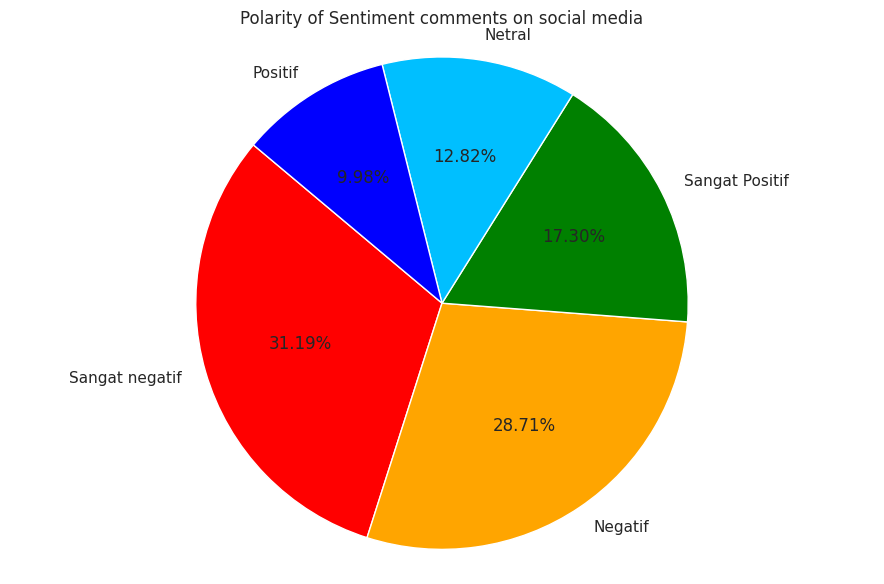

In [ ]:
# Hitung jumlah data per label
label_counts = ens_learn['Keterangan'].value_counts() # Changed 'data' to 'ens_learn'
labels = label_counts.index
sizes = label_counts.values
colors = ['red', 'orange', 'green', 'deepskyblue', 'blue']  # warna untuk 5 label

# Pie chart
plt.figure(figsize=(9, 6))
plt.pie(sizes, labels=labels, autopct='%2.2f%%', colors=colors, startangle=140)
plt.title('Polarity of Sentiment comments on social media')
plt.axis('equal')  # Agar pie chart berbentuk bulat
plt.tight_layout()
plt.show()

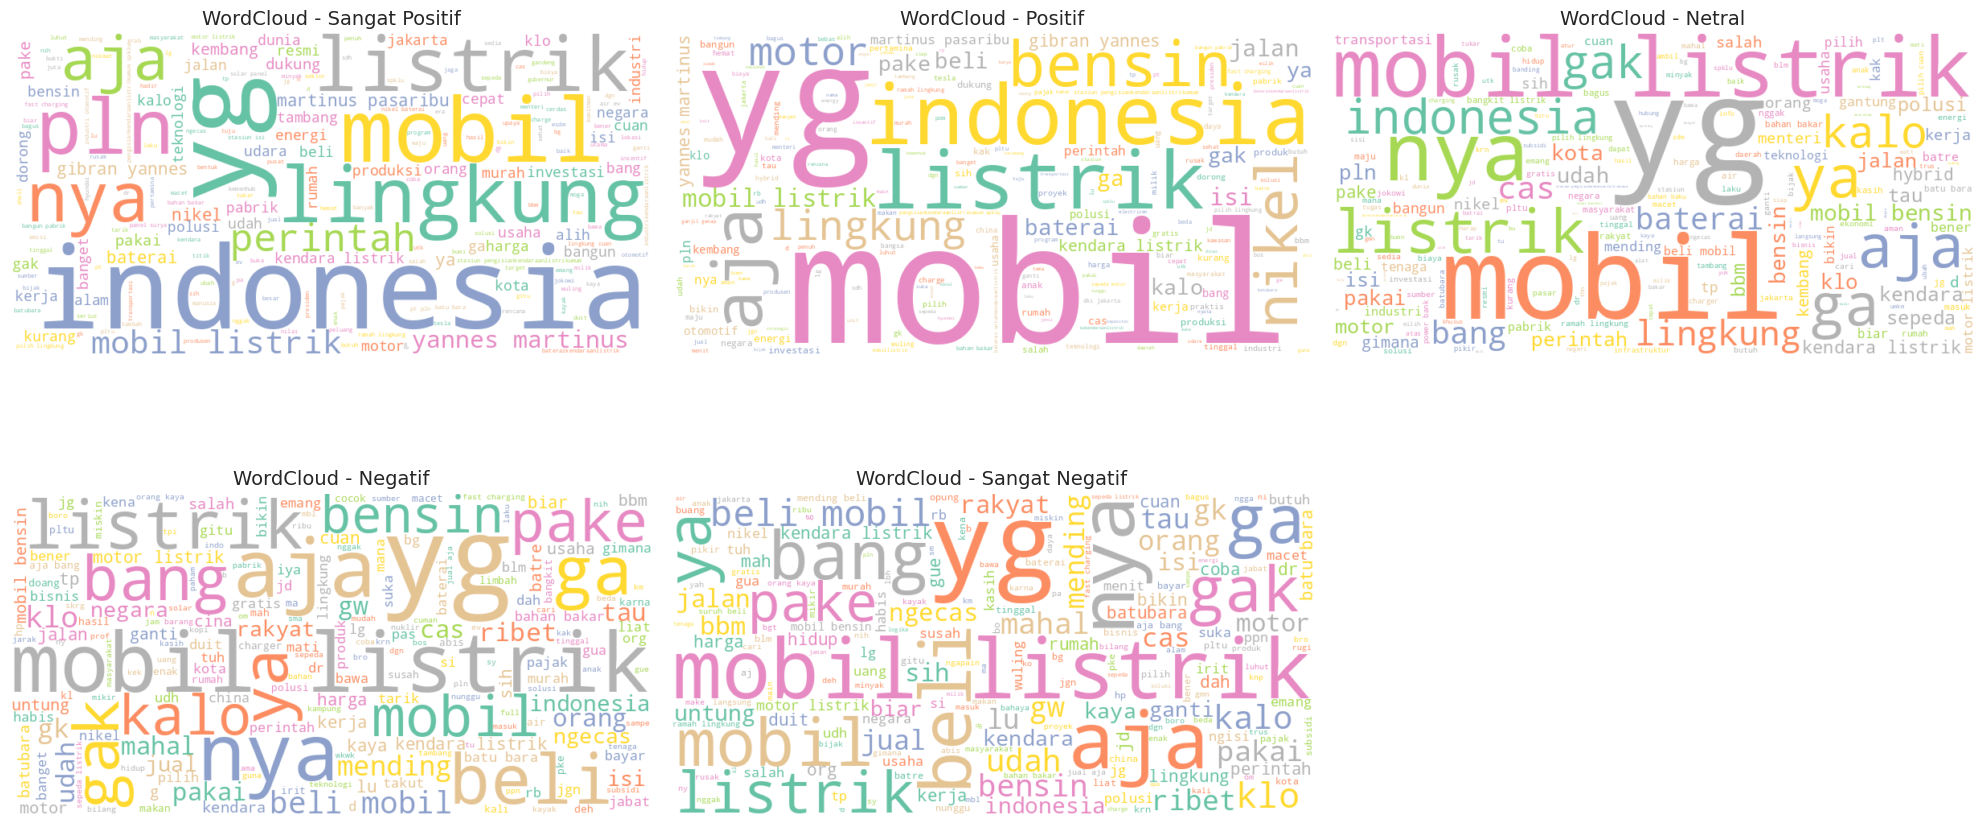

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your preprocessed DataFrame
data = ens_learn  # Assuming 'ens_learn' has your preprocessed data with 'Label' and 'stemmed_review' columns

# Mapping label angka ke teks (opsional, biar WordCloud-nya jelas)
label_names = {
    0: 'Sangat Positif',
    1: 'Positif',
    2: 'Netral',
    3: 'Negatif',
    4: 'Sangat Negatif'
}

# Buat WordCloud untuk masing-masing label
plt.figure(figsize=(20, 10))
for label in range(5):
    # Ambil semua teks dengan label tertentu
    texts = data[data['Label'] == label]['stemmed_review']

    # Gabungkan semua teks jadi satu string besar
    combined_text = ' '.join(texts.astype(str))

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(combined_text)

    # Plot
    plt.subplot(2, 3, label + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {label_names[label]}', fontsize=14)

plt.tight_layout()
plt.show()

# **Data Preparation**

**Tokenizer & Data Encode**

Untuk memasukkan teks ke BERT, teks tersebut harus dipecah menjadi token, dan kemudian token ini harus dipetakan ke indeksnya dalam kosakata tokenizer.

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer

print("Loading IndoBERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased', do_lower_case=True)

Loading IndoBERT Tokenizer


In [ ]:
# Dengan asumsi 'ens_learn' berisi kolom bernama 'filtered_text' dengan kalimat Anda
sentences = ens_learn['filtered_text'].tolist()

print("Original: ", sentences[56])

print("Tokenized: ", tokenizer.tokenize (sentences[68]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[68])))

Original:  kabar babak industri mobillistriknasional dg pembangunan pabrik baterai utkkendaraan
Tokenized:  ['hyundai', 'motor', 'group', 'lg', 'energy', 'solution', 'ltd', 'pembangunan', 'pabrik', 'sel', 'baterai', '##ken', '##dar', '##aan', '##list', '##rik', '##di', 'indonesia', 'terdepan', 'pasar', 'global']
Token IDS:  [31204, 4299, 6578, 17849, 17412, 31565, 15508, 2953, 4757, 1599, 14664, 18287, 13746, 1603, 28636, 3892, 2046, 1718, 18839, 2820, 4684]


In [ ]:
print("Original: ", sentences[68])

print("Tokenized: ", tokenizer.tokenize (sentences[68]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[68])))

Original:  hyundai motor group lg energy solution ltd pembangunan pabrik sel bateraikendaraanlistrikdi indonesia terdepan pasar global
Tokenized:  ['hyundai', 'motor', 'group', 'lg', 'energy', 'solution', 'ltd', 'pembangunan', 'pabrik', 'sel', 'baterai', '##ken', '##dar', '##aan', '##list', '##rik', '##di', 'indonesia', 'terdepan', 'pasar', 'global']
Token IDS:  [31204, 4299, 6578, 17849, 17412, 31565, 15508, 2953, 4757, 1599, 14664, 18287, 13746, 1603, 28636, 3892, 2046, 1718, 18839, 2820, 4684]


Fungsi tokenizer.encode menggabungkan beberapa langkah:

1.  Membagi kalimat menjadi token.
2.  Tambahkan token khusus [CLS] dan [SEP].
3.  Petakan token ke ID mereka.


In [ ]:
input_ids = []

for sent in sentences:
    # Check if sent is a string before tokenizing
    if isinstance(sent, str):
        # Tokenisasi kalimat tanpa menambahkan token [CLS] dan [SEP]
        tokens = tokenizer.tokenize(sent)

        # Menambahkan token [CLS] di awal dan [SEP] di akhir
        tokens = ['[CLS]'] + tokens + ['[SEP]']

        # Mengonversi token menjadi ID menggunakan tokenizer
        encoded_sent = tokenizer.convert_tokens_to_ids(tokens)

        input_ids.append(encoded_sent)
    else:
        # Handle non-string values (e.g., NaN) by appending an empty list or a special token ID
        input_ids.append([tokenizer.cls_token_id, tokenizer.sep_token_id])  # Example: append [CLS, SEP]

# Menampilkan hasil untuk salah satu kalimat
print("Original: ", sentences[51])
print("Tokenized: ", tokenizer.tokenize(sentences[51]))
print("Token IDs: ", input_ids[51])

Original:  pt pln persero berencana membangun stasiun pengisiankendaraanlistrikumum spklu pln mengembangkan spklu
Tokenized:  ['pt', 'pln', 'persero', 'berencana', 'membangun', 'stasiun', 'pengisian', '##ken', '##dar', '##aan', '##list', '##rik', '##umu', '##m', 'sp', '##kl', '##u', 'pln', 'mengembangkan', 'sp', '##kl', '##u']
Token IDs:  [3, 2865, 8989, 10926, 7012, 3500, 3429, 13414, 18287, 13746, 1603, 28636, 3892, 15172, 931, 1726, 7629, 943, 8989, 4382, 1726, 7629, 943, 4]


In [ ]:
# Periksa kalimat sentence (token)

print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  160


In [ ]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN =65

print("Padding/trucating all sentence to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/trucating all sentence to 65 values
Padding token: "[PAD]", ID: 0
Done


In [ ]:
input_ids[56]

array([    3,  4571,  3853,  3123,  2940, 28636,  3892,  4294, 13567,
        1483, 14116,  2953,  4757, 14664, 13279, 18287, 13746,  1603,
           4,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0])

In [ ]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent] # - Jika ID token adalah 0, maka itu adalah padding, set mask ke 0.
                                                      # - Jika ID token > 0, maka itu adalah token asli, set mask ke 1.

  attention_mask.append(att_mask)

In [ ]:
# Misalkan batas adalah 10
batas = 10

for i in range(0, len(attention_mask[51]), batas):
    print(attention_mask[51][i:i+batas])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


**Splitting**

Membagi data untuk menggunakan 80% untuk pelatihan dan 20% untuk testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Pastikan 'labels' memiliki jumlah data yang sama dengan 'input_ids'
labels = ens_learn['Label'].values  # Ambil kolom 'Label' dari DataFrame

# Gunakan 80% untuk training dan 20% untuk testing.
train_input, test_input, train_labels, test_labels = train_test_split(
    input_ids,
    labels,
    random_state=2020,  # Mengatur seed agar pembagian dataset dapat direproduksi
    test_size=0.2,      # Ubah test_size menjadi 0.2
    stratify=labels     # Pastikan distribusi label sama di train dan test
)

# Lakukan hal yang sama untuk attention masks.
train_mask, test_mask, _, _ = train_test_split(
    attention_mask,
    labels,
    random_state=2020,
    test_size=0.2,      # Ubah test_size menjadi 0.2
    stratify=labels     # Pastikan distribusi label sama di train dan test
)

In [ ]:
import numpy as np
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Test ==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (4137, 65)
Label:  (4137,)
Mask:  (4137, 65)

== Test ==
Input:  (1035, 65)
Label:  (1035,)
Mask:  (1035, 65)


**Creating data loaders**

Mengonversi ke Tipe Data PyTorch

In [ ]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [ ]:
# Membuat DataLoader dalam PyTorch

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our testing set.
test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# **Modeling**

**Set-up BERT pretrained model**

Menggunakan Transformers library untuk menginisialisasi model BERT (Bidirectional Encoder Representations from Transformers) untuk tugas klasifikasi urutan (sequence classification) dalam bahasa Indonesia.

In [ ]:
from transformers import BertForSequenceClassification, BertConfig
# Import AdamW from torch.optim instead of transformers
from torch.optim import AdamW

model = BertForSequenceClassification.from_pretrained(
    "indolem/indobert-base-uncased",
    num_labels = 5,
    output_attentions = False,
    output_hidden_states = False
)

model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Mencetak nama-nama dan dimensi dari bobot untuk:

1. Layer embedding.
2. Salah satu dari dua belas transformer.
3. Layer keluaran.

In [ ]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

total_params = sum(p.numel() for p in model.parameters())
print("==== Total Parameters ====")
print(f'Total Parameters: {total_params}')

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (31923, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.e

**Setting-up optimizer & schedular**

Dengan menggunakan optimizer ini, kita dapat mengoptimalkan parameter-model menggunakan metode backpropagation selama proses pelatihan (training).

In [ ]:
# Import the AdamW optimizer
from torch.optim import AdamW
import torch
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification
# Now we can use AdamW because it's been imported
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

Dalam melakukan komputasi data, pada umumnya menggunakan gradient descent untuk melakukan proses penjumlahan dan turunan dengan tujuan menemukan titik yang meminimumkan suatu fungsi yang dapat diturunkan. Pada penelitian ini menggunakan algoritma AdamW Optimizer. Seperti Stochastic Gradient Descent, namun algoritma Adam W memiliki keunggulan Root Mean Square Propagation yang tidak dimiliki di Stochastic Gradient Descent.




In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 16

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

**Training BERT**

In [ ]:
import numpy as np

# Menghitung akurasi prediksi model terhadap label pada suatu tugas klasifikasi.
def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

# Mengelola waktu yang diukur dalam detik dan mengembalikan waktu yang diformat dengan representasi jam:menit:detik
def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# --------------
# PERSIAPAN AWAL
# --------------

# Setting Seed:
# mengatur seed agar hasil eksperimen dapat diproduksi
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Inisialisasi Variabel:
# menyimpan nilai loss selama pelatihan.
loss_values = []


# --------------
# PELATIHAN MODEL
# --------------

# Loop Epoch:
# dilakukan loop sebanyak epochs (jumlah epoch yang ditentukan).
for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time() # measure how long the training epoch takes.

  # Inisialisasi Total Loss:
  # deklasrasi nilai loss = 0 (direset ke 0 di awal setiap epoch).
  total_loss = 0

  # Set Model ke Mode Training:
  # mengaktifkan mode training pada model.
  model.train()

  # Loop Batches:
  # for each batch of training data (dilakukan loop untuk setiap batch di dalam train_dataloader).
  for step, batch in enumerate(train_dataloader):

    # Progress update/progress report every 1 batches:
    # diberikan informasi mengenai progress setiap batch.
    if step % 1 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))

    # Muat Data ke GPU/CPU:
    # token ids/data masukan, attention masks, dan label dari batch dimuat ke perangkat GPU.
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad() # PyTorch
                      # dlm setiap batch, set gradien mjd set zero

    # Forward Pass:
    # model dimasukkan token ids, attention mask, dan label. Output berupa nilai loss.
    outputs = model(b_input_ids,
                    token_type_ids=None,  # diperlukan jika ingin melakukan klasifikasi menggunakan 2 sentences yg dianggap 1 data.
                    attention_mask=b_input_mask,
                    labels=b_labels)

    loss = outputs[0] # ambil nilai loss, utk mengambil nilai sebenarnya: menggunakan loss.item kemuddian lakukan backward.

    # Backward Pass:
    # gradien dihitung dan dilakukan backward pass.
    total_loss += loss.item()

    loss.backward()

    # PyTorch
    # Menerapkan normalisasi gradien untuk mencegah eksplosi gradien.
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Optimasi dan Scheduler:
    # optimizer melakukan langkah optimisasi (mengupdate parameter model) dan scheduler dipindahkan.
    optimizer.step()

    scheduler.step()

  # Hitung Rata-rata Loss (total loss/jmh batch):
  # rata-rata loss dihitung untuk satu epoch.
  avg_train_loss = total_loss / len(train_dataloader)

  # Simpan Loss:
  # rata-rata loss disimpan di dalam loss_values.
  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))


# ===================================
#             evaluation
# ===================================

# print("Running Evaluation...")

t0 = time.time()

# Set Model ke Mode Evaluasi:
# model.eval() mengubah model ke mode evaluasi.
model.eval()

train_loss, train_accuracy = 0, 0
nb_train_steps, nb_train_examples = 0, 0

# Loop Batches pada Data Uji:
# dilakukan loop untuk setiap batch di dalam train_dataloader.
for batch in train_dataloader:

  # Data disimpan dalam GPU
  # data uji dimuat ke perangkat GPU.
  batch = tuple(t.to(device) for t in batch)

  # Pisahkan batch lagi
  b_input_ids, b_input_mask, b_labels = batch

  # Forward Pass pada Data Uji:
  # dengan torch.no_grad(), model melakukan prediksi pada data uji.
  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  # Mengambil nilai output
  # Labelnya dikembalikan
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()    # Disimpan di CPU, karena akan ada proses matematis sederhana
  label_ids = b_labels.to('cpu').numpy()

  # Hitung Akurasi pada Data Uji (jmh data yg sesuai/seluruh data):
  # akurasi dihitung dengan fungsi flat_accuracy().
  tmp_train_accuracy = flat_accuracy(logits, label_ids)

  train_accuracy += tmp_train_accuracy

  nb_train_steps += 1

# Tampilkan Hasil Pengujian:
# tampilkan akurasi dan waktu pengujian.
print("   Accuracy: {0:.2f}".format(train_accuracy/nb_train_steps))
print("   Testing took: {:}".format(format_time(time.time() - t0)))


print("Training complete!")

======= Epoch 1 / 16 =======
Training...
Batch     1 of   259.     Elapsed: 0:00:00
Batch     2 of   259.     Elapsed: 0:00:00
Batch     3 of   259.     Elapsed: 0:00:01
Batch     4 of   259.     Elapsed: 0:00:01
Batch     5 of   259.     Elapsed: 0:00:01
Batch     6 of   259.     Elapsed: 0:00:01
Batch     7 of   259.     Elapsed: 0:00:01
Batch     8 of   259.     Elapsed: 0:00:02
Batch     9 of   259.     Elapsed: 0:00:02
Batch    10 of   259.     Elapsed: 0:00:02
Batch    11 of   259.     Elapsed: 0:00:02
Batch    12 of   259.     Elapsed: 0:00:02
Batch    13 of   259.     Elapsed: 0:00:03
Batch    14 of   259.     Elapsed: 0:00:03
Batch    15 of   259.     Elapsed: 0:00:03
Batch    16 of   259.     Elapsed: 0:00:03
Batch    17 of   259.     Elapsed: 0:00:04
Batch    18 of   259.     Elapsed: 0:00:04
Batch    19 of   259.     Elapsed: 0:00:04
Batch    20 of   259.     Elapsed: 0:00:04
Batch    21 of   259.     Elapsed: 0:00:04
Batch    22 of   259.     Elapsed: 0:00:05
Batch    23 o

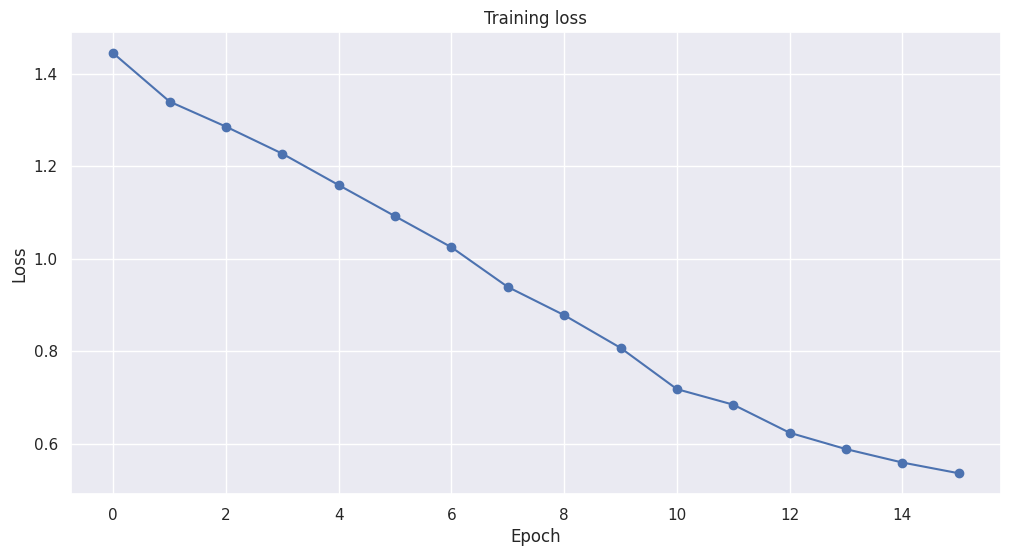

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (12, 6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

**Predict**

In [ ]:
# Pastikan import yang diperlukan
import numpy as np

# Simpan hasil prediksi dari model
prediction = []  # Menyimpan logits dari semua batch
true_labels = []  # Menyimpan label sebenarnya

# Loop untuk batch dalam train_dataloader (atau test_dataloader jika evaluasi)
for batch in train_dataloader:

    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs.logits.detach().cpu().numpy()
    labels = b_labels.to('cpu').numpy()

    prediction.append(logits)
    true_labels.append(labels)

# Flatten predictions dan true labels
flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]
flat_true_labels = np.array(flat_true_labels).flatten()  # Ubah ke array untuk perhitungan lebih lanjut

# Sekarang variabel flat_prediction dan flat_true_labels sudah siap digunakan!
print(flat_prediction[:10])  # Cek beberapa prediksi pertama
print(flat_true_labels[:10])  # Cek beberapa label pertama

[2 4 2 2 3 4 4 4 1 3]
[3 4 2 2 1 4 4 4 1 3]


**K-Fold**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np

# Generate dummy dataset dengan 5 label
X, y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_informative=15, random_state=42)

# Inisialisasi K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Model yang digunakan
model = RandomForestClassifier(n_estimators=100, random_state=42)

accuracies = []

# Proses K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f'Akurasi Fold: {acc:.4f}')

# Rata-rata akurasi
print(f'Rata-rata Akurasi: {np.mean(accuracies):.4f}')

Akurasi Fold: 0.6850
Akurasi Fold: 0.7300
Akurasi Fold: 0.6050
Akurasi Fold: 0.6900
Akurasi Fold: 0.7150
Rata-rata Akurasi: 0.6850


In [ ]:
# Setelah K-Fold, pilih model terbaik dan latih ulang dengan seluruh training data
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Evaluasi pada test set
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Akurasi pada Test Set: {test_acc:.4f}")

Akurasi pada Test Set: 0.7150


**Evaluasi Confusion Matrix**

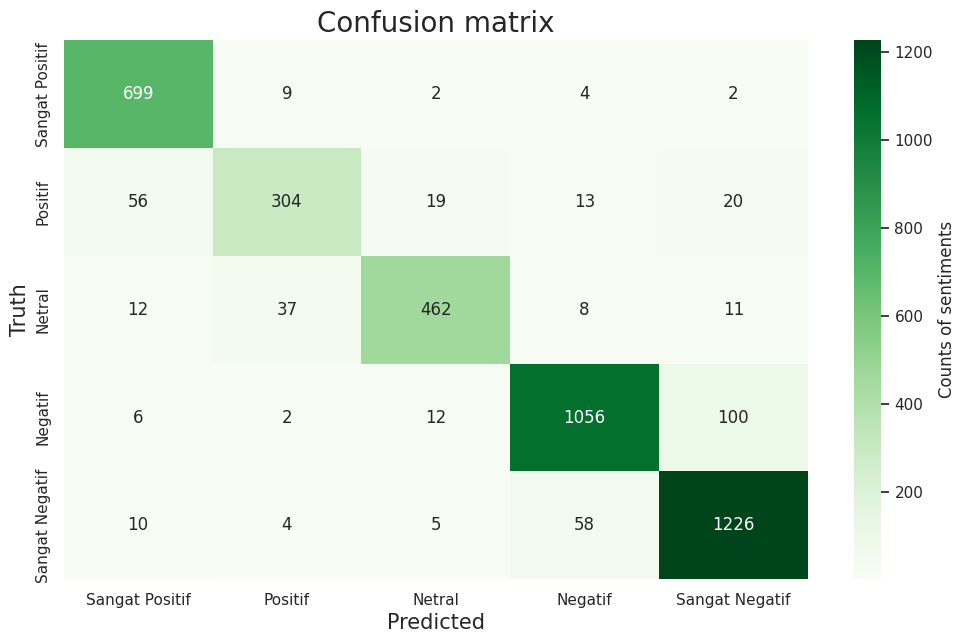

In [ ]:
# Menghitung confusion matrixflat_true_labels, flat_prediction
cm_hasil = confusion_matrix(flat_true_labels, flat_prediction)

# Plot confusion matrix
plt.figure(figsize=(12, 7))
sentiment_classes = ['Sangat Positif', 'Positif', 'Netral', 'Negatif', 'Sangat Negatif']
sb.heatmap(cm_hasil, cmap=plt.cm.Greens, annot=True, cbar_kws={'label': 'Counts of sentiments'}, fmt='d',
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion matrix', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

print(classification_report(flat_true_labels, flat_prediction))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       716
           1       0.85      0.74      0.79       412
           2       0.92      0.87      0.90       530
           3       0.93      0.90      0.91      1176
           4       0.90      0.94      0.92      1303

    accuracy                           0.91      4137
   macro avg       0.90      0.88      0.89      4137
weighted avg       0.91      0.91      0.90      4137

